In [1]:
#Tutorial from https://levelup.gitconnected.com/a-complex-reinforcement-learning-crypto-trading-environment-in-python-134f3faf0d7a

In [1]:
#load data
import os
import pandas as pd

i=0
for file in [x for x in os.listdir("data/") if "csv" in x]:
    print ("loading "+file)
    temp_df=pd.read_csv("data/"+file)
    if i:
        full_df=full_df.append(temp_df)
    else:
        full_df=temp_df
#     print(len(full_df))
    i+=1
full_df.info()

loading coin_Litecoin.csv
loading coin_Monero.csv
loading coin_Dogecoin.csv
loading coin_Ethereum.csv
loading coin_XRP.csv
loading coin_Uniswap.csv
loading coin_Bitcoin.csv
loading coin_EOS.csv
loading coin_Tether.csv
loading coin_ChainLink.csv
loading coin_BinanceCoin.csv
loading coin_Iota.csv
loading coin_Polkadot.csv
loading coin_USDCoin.csv
loading coin_Cardano.csv
loading coin_Stellar.csv
loading coin_Cosmos.csv
loading coin_Solana.csv
loading coin_CryptocomCoin.csv
loading coin_Tron.csv
loading coin_WrappedBitcoin.csv
loading coin_Aave.csv
loading coin_NEM.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37082 entries, 0 to 2287
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        37082 non-null  int64  
 1   Name       37082 non-null  object 
 2   Symbol     37082 non-null  object 
 3   Date       37082 non-null  object 
 4   High       37082 non-null  float64
 5   Low        37082 non-null  float64

In [3]:
full_df.describe()

SNo          High           Low          Open         Close  \
count  37082.000000  37082.000000  37082.000000  37082.000000  37082.000000   
mean    1056.699018   1016.058015    952.987707    985.323755    987.120511   
std      755.992373   5249.503670   4907.932082   5088.101367   5093.703878   
min        1.000000      0.000089      0.000079      0.000086      0.000086   
25%      420.000000      0.075664      0.069536      0.072456      0.072648   
50%      910.000000      1.008733      0.999850      1.001157      1.001138   
75%     1585.000000     31.916399     28.996246     30.459673     30.512205   
max     2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap  
count  3.708200e+04  3.708200e+04  
mean   3.022542e+09  1.542943e+10  
std    1.190963e+10  7.059128e+10  
min    0.000000e+00  0.000000e+00  
25%    4.937190e+06  2.395955e+08  
50%    8.512805e+07  1.405335e+09  
75%    9.388489e+08  5.159305e+09  
max    3.509679e+11  1.186364e+12

In [4]:
full_df.Date=pd.to_datetime(full_df.Date)

In [5]:
full_df.loc[full_df.Name=='Bitcoin'].describe()

SNo          High           Low          Open         Close  \
count  2991.000000   2991.000000   2991.000000   2991.000000   2991.000000   
mean   1496.000000   6893.326038   6486.009539   6700.146240   6711.290443   
std     863.571653  11642.832456  10869.032130  11288.043736  11298.141921   
min       1.000000     74.561096     65.526001     68.504997     68.431000   
25%     748.500000    436.179001    422.879486    430.445496    430.569489   
50%    1496.000000   2387.610107   2178.500000   2269.889893   2286.409912   
75%    2243.500000   8733.926948   8289.800459   8569.656494   8576.238715   
max    2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap  
count  2.991000e+03  2.991000e+03  
mean   1.090633e+10  1.208761e+11  
std    1.888895e+10  2.109438e+11  
min    0.000000e+00  7.784112e+08  
25%    3.036725e+07  6.305579e+09  
50%    9.460360e+08  3.741503e+10  
75%    1.592015e+10  1.499957e+11  
max    3.509679e+11  1.186364e+12

In [6]:
full_df["Performance"]=(full_df["Close"]-full_df["Open"])*100/full_df["Open"]

In [7]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37082 entries, 0 to 2287
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   SNo          37082 non-null  int64         
 1   Name         37082 non-null  object        
 2   Symbol       37082 non-null  object        
 3   Date         37082 non-null  datetime64[ns]
 4   High         37082 non-null  float64       
 5   Low          37082 non-null  float64       
 6   Open         37082 non-null  float64       
 7   Close        37082 non-null  float64       
 8   Volume       37082 non-null  float64       
 9   Marketcap    37082 non-null  float64       
 10  Performance  37082 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 3.4+ MB


In [8]:
full_df.sample(10)

SNo       Name Symbol                Date        High         Low  \
209    210    Cardano    ADA 2018-04-29 23:59:59    0.387901    0.347508   
732    733     Monero    XMR 2016-05-24 23:59:59    0.992032    0.901127   
1217  1218  Chainlink   LINK 2021-01-20 23:59:59   21.929914   19.190357   
39      40    Bitcoin    BTC 2013-06-07 23:59:59  119.000000  106.419998   
462    463        NEM    XEM 2016-07-07 23:59:59    0.009407    0.007315   
624    625     Cosmos   ATOM 2020-11-28 23:59:59    5.536386    5.235588   
2912  2913   Litecoin    LTC 2021-04-19 23:59:59  281.352549  251.514485   
1608  1609    Stellar    XLM 2018-12-31 23:59:59    0.117888    0.112506   
1647  1648   Ethereum    ETH 2020-02-10 23:59:59  229.184609  218.080052   
783    784  Chainlink   LINK 2019-11-13 23:59:59    3.077772    2.789124   

            Open       Close        Volume     Marketcap  Performance  
209     0.360670    0.365057  6.718870e+08  9.464859e+09     1.216345  
732     0.914471    0.901127  2.203080e+05  1.078122e+07    -1.459203  
1217   20.721283   21.846777  3.432961e+09  8.771690e+09     5.431582  
39    118.970001  111.500000  0.000000e+00  1.255259e+09    -6.278895  
462     0.009346    0.007649  2.017560e+06  6.884361e+07   -18.150279  
624     5.361375    5.434740  1.841231e+08  1.121998e+09     1.368402  
2912  273.645139  261.919217  9.384818e+09  1.748374e+10    -4.285083  
1608    0.117709    0.112813  1.011183e+08  2.161590e+09    -4.159130  
1647  228.549129  223.522700  1.621001e+10  2.450883e+10    -2.199277  
783     2.814473    3.018290  2.093621e+08  1.056402e+09     7.241771

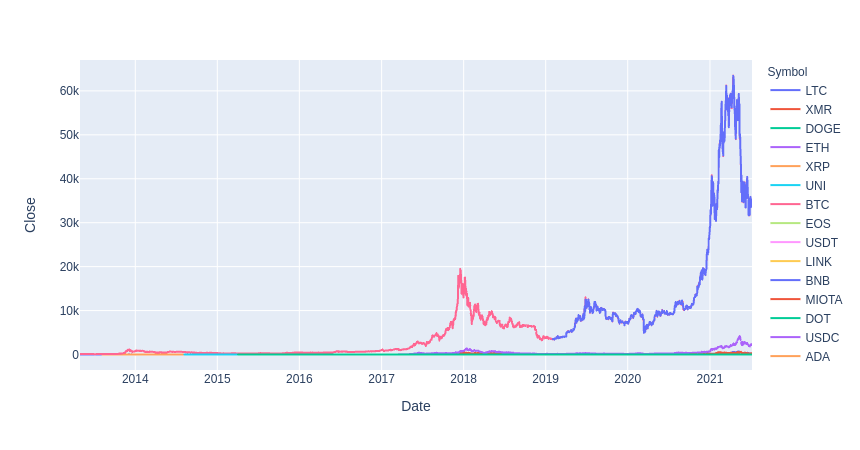

In [9]:
#visualize data

import plotly.express as px

fig = px.line(full_df, x='Date', y="Close", color="Symbol")
fig.show()

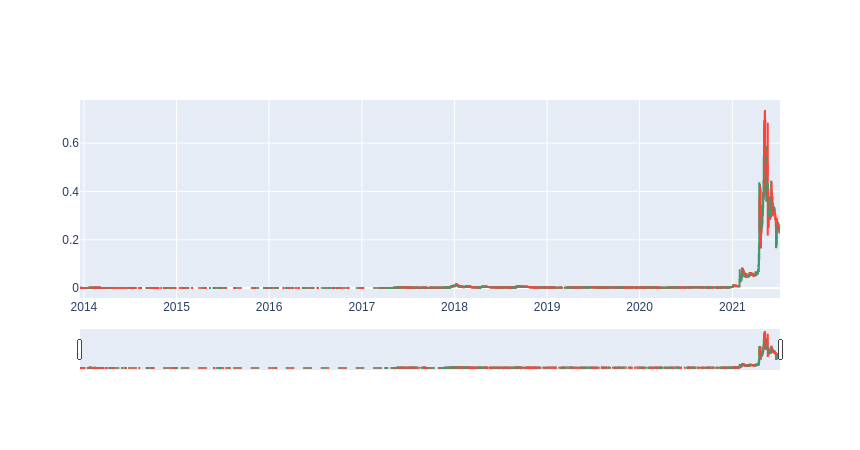

In [10]:
#candlestick, explanation of terms: https://analyzingalpha.com/open-high-low-close-stocks

# print(full_df.Symbol.unique())

filt_df=full_df.loc[full_df.Symbol=="DOGE"]

import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=filt_df['Date'],
                open=filt_df['Open'],
                high=filt_df['High'],
                low=filt_df['Low'],
                close=filt_df['Close'])])

fig.show()

In [ ]:
full_df.loc[[True if "2014-01-01" in str(x) else False for x in full_df.Date]]

In [ ]:
full_df.loc[[True if "2021-06-07" in str(x) else False for x in full_df.Date]]

In [ ]:
full_df.loc[(full_df.Name=="Litecoin")&(full_df.SNo>=248) &(full_df.SNo<=2962) ]

# Cleaning and wrangling data

## Stationary/Non-stationary data

In [17]:
#checking some coins 

from statsmodels.tsa.stattools import adfuller
file="coin_Ethereum.csv"
temp_df=pd.read_csv("data/"+file)
temp_df["Performance"]=(temp_df["Close"]-temp_df["Open"])*100/temp_df["Open"]

for column in ['High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap','Performance']:
    print(column)
    print(adfuller(temp_df[column].values, autolag="AIC")[1])
    
# p<=0.005 Stationary data

High
0.892805872838831
Low
0.9829731516943438
Open
0.9409376190568997
Close
0.9563225993836113
Volume
0.26348144662258965
Marketcap
0.9714911454429043
Performance
3.2339762012800147e-13


In [22]:
#testing 'logged and diffed' over a column
import numpy as np
temp_df['diffed'] = temp_df['Close'] - temp_df['Close'].shift(1)
temp_df['logged_and_diffed'] = np.log(temp_df['Close']) - np.log(temp_df['Close'].shift(1))
temp_df.dropna(inplace=True)
print("Close")
print(adfuller(temp_df['Close'].values, autolag="AIC")[1])
print("Close - logged and diffed")
print(adfuller(temp_df['logged_and_diffed'].values, autolag="AIC")[1])

Close
0.956261813174396
Close - logged and diffed
1.9108222435376626e-13


In [15]:
#checking some coins 

from statsmodels.tsa.stattools import adfuller
file="coin_XRP.csv"
temp_df=pd.read_csv("data/"+file)
temp_df["Performance"]=(temp_df["Close"]-temp_df["Open"])*100/temp_df["Open"]

for column in ['High', 'Low', 'Open', 'Close','Volume', 'Marketcap','Performance']:
    print(column)
    print(adfuller(temp_df[column].values, autolag="AIC")[1])
    
# p<=0.005 Stationary data

High
0.0027940330805433277
Low
0.01150396112068529
Open
0.0026994727061966143
Close
0.004444111611333446
Volume
0.0006967111948261382
Marketcap
0.007583432922450331
Performance
2.9248373562688434e-25


In [8]:
temp_df.iloc[0:int(len(temp_df)/2),-1].describe()

count    137.000000
mean       1.971182
std        8.886451
min      -20.435294
25%       -4.405990
50%        1.280853
75%        6.558709
max       27.337077
Name: Performance, dtype: float64

In [9]:
temp_df.iloc[int(len(temp_df)/2):,-1].describe()

count    138.000000
mean       0.134219
std        8.287335
min      -33.511083
25%       -4.874091
50%        0.556128
75%        4.850690
max       31.005289
Name: Performance, dtype: float64

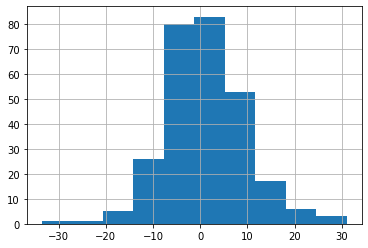

In [10]:
from matplotlib import pyplot
series = temp_df["Performance"]
series.hist()
pyplot.show()


In [9]:
#Wrangling process for all coins
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
import os

def log_diff(temp_df,column):
    temp_df[f'log_and_diffed_{column}'] = np.log(temp_df[column]) - np.log(temp_df[column].shift(1))    
    return temp_df

for file in [x for x in os.listdir("data/") if "csv" in x]:
    print ("loading "+file)
    temp_df=pd.read_csv("data/"+file)
    temp_df["Performance"]=(temp_df["Close"]-temp_df["Open"])*100/temp_df["Open"]
    
    for column in ['High', 'Low', 'Open', 'Close','Volume', 'Marketcap']:   
        temp_df=log_diff(temp_df,column)
        
    temp_df.dropna(inplace=True)
    temp_df.drop(temp_df.iloc[0,:].name,inplace=True) #drop 1st value due to inf and Nan errors
    temp_df.drop(labels=['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close','Volume', 'Marketcap'],axis=1,inplace=True)
    temp_df.to_csv(f"data/wrangled/{file[5:-4]}_wrangled.csv",index=False)
    

loading coin_Litecoin.csv
loading coin_Monero.csv
loading coin_Dogecoin.csv


/home/alvaro/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/alvaro/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


loading coin_Ethereum.csv
loading coin_XRP.csv
loading coin_Uniswap.csv
loading coin_Bitcoin.csv
loading coin_EOS.csv


/home/alvaro/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/alvaro/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/alvaro/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


loading coin_Tether.csv
loading coin_ChainLink.csv
loading coin_BinanceCoin.csv
loading coin_Iota.csv
loading coin_Polkadot.csv
loading coin_USDCoin.csv


/home/alvaro/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/alvaro/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/alvaro/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/alvaro/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


loading coin_Cardano.csv
loading coin_Stellar.csv
loading coin_Cosmos.csv
loading coin_Solana.csv
loading coin_CryptocomCoin.csv
loading coin_Tron.csv
loading coin_WrappedBitcoin.csv
loading coin_Aave.csv
loading coin_NEM.csv


/home/alvaro/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/alvaro/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/alvaro/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/alvaro/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
